In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv('listings.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200414051904,2020-04-15,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,within a day,100%,0%,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,$25.00,30,730,30,30,730,730,30.0,730.0,2 months ago,t,0,0,0,14,2020-04-15,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200414051904,2020-04-15,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,67%,33%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,$0.00,2,14,2,2,14,14,2.0,14.0,7 months ago,t,0,0,1,73,2020-04-15,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.17
2,2708,https://www.airbnb.com/rooms/2708,20200414051904,2020-04-14,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Blendtec® Designer 625 

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37728 entries, 0 to 37727
Columns: 106 entries, id to reviews_per_month
dtypes: float64(21), int64(21), object(64)
memory usage: 30.5+ MB


In [0]:
data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.772800e+04,3.772800e+04,0.0,0.0,0.0,3.772800e+04,37725.000000,37725.000000,37728.000000,37728.000000,37728.000000,37691.000000,37625.000000,37340.00000,267.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,3.772800e+04,37728.000000,3.772800e+04,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,37728.000000,29665.000000,29618.000000,29619.000000,29606.000000,29617.000000,29602.000000,29598.000000,37728.000000,37728.000000,37728.000000,37728.000000,30130.000000
mean,2.510718e+07,2.020041e+13,NaN,NaN,NaN,9.239839e+07,31.934129,31.934129,34.050677,-118.317340,3.662956,1.476971,1.445023,1.97354,934.715356,1.929230,12.411551,659.622111,11.907178,16.556086,781.926076,9.115055e+05,16.116688,8.692653e+05,15.498171,32.905269,50.644137,163.907098,35.493930,12.714377,94.253969,9.607772,9.417975,9.745389,9.716041,9.704446,9.426380,8.387405,6.418999,1.337813,0.543655,1.708519
std,1.270269e+07,1.558614e+01,NaN,NaN,NaN,9.505086e+07,214.054352,214.054352,0.120514,0.166047,2.704955,1.016924,1.142078,1.67804,956.157619,1.787466,26.106110,523.722838,25.632044,58.636711,495.475074,4.421519e+07,56.934057,4.216453e+07,13.431667,26.058789,38.256859,142.518219,64.404886,19.692785,9.020926,0.898662,1.005547,0.775942,0.826401,0.723278,0.938078,24.535917,24.192461,3.655071,3.886698,1.832193
min,1.090000e+02,2.020041e+13,NaN,NaN,NaN,5.210000e+02,0.000000,0.000000,33.338830,-118.934220,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.518486e+07,2.020041e+13,NaN,NaN,NaN,1.429316e+07,1.000000,1.000000,33.998767,-118.422255,2.000000,1.000000,1.000000,1.00000,350.000000,1.000000,1.000000,35.000000,1.000000,1.000000,93.000000,9.900000e+01,1.000000,9.900000e+01,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,93.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.320000
50%,2.616943e+07,2.020041e+13,NaN,NaN,NaN,5.131928e+07,2.000000,2.000000,34.061520,-118.342110,3.000000,1.000000,1.000000,1.00000,700.000000,1.000000,3.000000,1125.000000,2.000000,3.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,17.000000,43.000000,66.000000,141.000000,9.000000,3.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.030000
75%,3.667433e+07,2.020041e+13,NaN,NaN,NaN,1.525088e+08,6.000000,6.000000,34.104260,-118.250730,4.000000,2.000000,2.000000,2.00000,1150.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1.125000e+03,30.000000,1.125000e+03,30.000000,59.000000,89.000000,327.000000,40.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,1.000000,0.000000,2.560000
max,4.317819e+07,2.020041e+13,NaN,NaN,NaN,3.437903e+08,2324.000000,2324.000000,34.811190,-117.652640,24.000000,16.000000,13.000000,50.00000,7000.000000,24.000000,1125.000000,10004.000000,1125.000000,1125.000000,10004.000000,2.14748

In [0]:
col_list=list(data.columns)

In [0]:
col_list

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [0]:
data['price'].head()

0    $122.00
1    $168.00
2     $79.00
3    $155.00
4     $80.00
Name: price, dtype: object

In [0]:
data.price.tail()

37723    $84.00
37724    $34.00
37725    $89.00
37726    $99.00
37727    $87.00
Name: price, dtype: object

We see that the price has dollar sign in front of them and its class is object class, so for our model we need it to be float or int so we will format it to float after removing the '$' sign

In [0]:
data['price'] = data['price'].replace('[\$,)]','', regex=True).astype('float')

In [0]:
data.price.head()

0    122.0
1    168.0
2     79.0
3    155.0
4     80.0
Name: price, dtype: float64

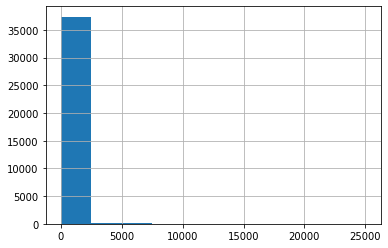

In [0]:
data.price.hist()


In [0]:
import numpy as np
data['log_price'] = np.log(data['price'].values)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [0]:
data['log_price'].head()

0    4.804021
1    5.123964
2    4.369448
3    5.043425
4    4.382027
Name: log_price, dtype: float64

In [0]:
pricelist=list(data.log_price.unique())

In [0]:
pricelist

[4.804021044733257,
 5.123963979403259,
 4.3694478524670215,
 5.043425116919247,
 4.382026634673881,
 4.976733742420574,
 4.31748811353631,
 4.653960350157523,
 5.713732805509369,
 4.442651256490317,
 4.59511985013459,
 3.871201010907891,
 4.248495242049359,
 4.795790545596741,
 4.499809670330265,
 3.912023005428146,
 4.30406509320417,
 5.1647859739235145,
 5.616771097666572,
 4.553876891600541,
 4.48863636973214,
 5.978885764901122,
 4.941642422609304,
 5.703782474656201,
 5.298317366548036,
 4.820281565605037,
 5.3706380281276624,
 4.0943445622221,
 4.605170185988092,
 5.10594547390058,
 4.574710978503383,
 5.517452896464707,
 4.867534450455582,
 4.8283137373023015,
 5.521460917862246,
 4.23410650459726,
 4.543294782270004,
 6.1092475827643655,
 4.74493212836325,
 4.465908118654584,
 4.174387269895637,
 5.220355825078324,
 6.802394763324311,
 3.7612001156935624,
 3.828641396489095,
 5.988961416889864,
 3.8066624897703196,
 4.859812404361672,
 4.060443010546419,
 4.07753744390572,
 5.

In [0]:
for i in range(len(pricelist)):
    print(i, pricelist[i])

0 4.804021044733257
1 5.123963979403259
2 4.3694478524670215
3 5.043425116919247
4 4.382026634673881
5 4.976733742420574
6 4.31748811353631
7 4.653960350157523
8 5.713732805509369
9 4.442651256490317
10 4.59511985013459
11 3.871201010907891
12 4.248495242049359
13 4.795790545596741
14 4.499809670330265
15 3.912023005428146
16 4.30406509320417
17 5.1647859739235145
18 5.616771097666572
19 4.553876891600541
20 4.48863636973214
21 5.978885764901122
22 4.941642422609304
23 5.703782474656201
24 5.298317366548036
25 4.820281565605037
26 5.3706380281276624
27 4.0943445622221
28 4.605170185988092
29 5.10594547390058
30 4.574710978503383
31 5.517452896464707
32 4.867534450455582
33 4.8283137373023015
34 5.521460917862246
35 4.23410650459726
36 4.543294782270004
37 6.1092475827643655
38 4.74493212836325
39 4.465908118654584
40 4.174387269895637
41 5.220355825078324
42 6.802394763324311
43 3.7612001156935624
44 3.828641396489095
45 5.988961416889864
46 3.8066624897703196
47 4.859812404361672
48 4

In [0]:
print('x=',pricelist[525])
x=pricelist[525]

x= -inf


We can see that there are some Nan values for price in the dataset which makes the log price to -infinite so we drop the records with null price

In [0]:
data[data['log_price']==x][['price','log_price']]

,price,log_price
11810,0.0,-inf
11844,0.0,-inf
14214,0.0,-inf
14301,0.0,-inf
21497,0.0,-inf
33133,0.0,-inf
34897,0.0,-inf
35372,0.0,-inf
35373,0.0,-inf
35374,0.0,-inf


In [0]:
data=data[data['price']!=0]
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,109,https://www.airbnb.com/rooms/109,20200414051904,2020-04-15,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,within a day,100%,0%,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,30,730,30,30,730,730,30.0,730.0,2 months ago,t,0,0,0,14,2020-04-15,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02,4.804021
1,344,https://www.airbnb.com/rooms/344,20200414051904,2020-04-15,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,67%,33%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,2,14,2,2,14,14,2.0,14.0,7 months ago,t,0,0,1,73,2020-04-15,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.17,5.123964
2,2708,https://www.airbnb.com/rooms/2708,20200414051904,2020-04-14,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Blendtec® Designer 62

In [0]:
data[data['price']==0]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price


In [0]:
data['extra_people']

0        $25.00
1         $0.00
2         $0.00
3         $0.00
4        $25.00
          ...  
37723     $0.00
37724     $0.00
37725     $0.00
37726     $0.00
37727     $0.00
Name: extra_people, Length: 37713, dtype: object

In [0]:
data['extra_people'].unique()

array(['$25.00', '$0.00', '$9.00', '$15.00', '$45.00', '$10.00', '$12.00',
       '$35.00', '$50.00', '$20.00', '$59.00', '$40.00', '$30.00',
       '$100.00', '$60.00', '$70.00', '$8.00', '$75.00', '$5.00',
       '$11.00', '$27.00', '$6.00', '$150.00', '$33.00', '$38.00',
       '$29.00', '$65.00', '$85.00', '$200.00', '$125.00', '$18.00',
       '$80.00', '$19.00', '$24.00', '$14.00', '$7.00', '$49.00',
       '$105.00', '$95.00', '$55.00', '$17.00', '$89.00', '$22.00',
       '$21.00', '$300.00', '$199.00', '$28.00', '$32.00', '$46.00',
       '$47.00', '$52.00', '$39.00', '$170.00', '$90.00', '$275.00',
       '$58.00', '$250.00', '$140.00', '$99.00', '$175.00', '$34.00',
       '$13.00', '$120.00', '$26.00', '$61.00', '$23.00', '$16.00',
       '$72.00', '$48.00', '$42.00', '$78.00', '$188.00', '$62.00',
       '$87.00', '$77.00', '$115.00', '$31.00', '$73.00', '$97.00',
       '$180.00', '$299.00', '$36.00', '$190.00', '$54.00', '$110.00',
       '$67.00', '$44.00', '$68.00', '$

In [0]:
data['extra_people'] = data['extra_people'].replace('[\$,)]','', regex=True)
data['extra_people'] = data['extra_people'].replace('t',0, regex=True)
data['extra_people'] = data['extra_people'].astype('float')

In [0]:
data['zipcode'].unique()

array(['90230', '91505', '90046', '90405', '90706', '90066', '91367',
       '90039', '90291', '90802', '90277', '90019', '90247', '90036',
       '90068', '90501', '91607', '90026', '91208', '90042', '90065',
       '90232', '90025', '90004', '90027', '90012', '90265', '90401',
       '90505', '90034', '91604', '90038', '91405', '90262', '90029',
       '91344', '91206', '90212', '90211', '90006', '90403', '90069',
       '90016', '90035', '90064', '91316', '90715', '90056', '91343',
       '91042', '90045', '91364', '90402', '90010', '90745', '90814',
       '91601', '91001', '91302', '90290', '91352', '90815', '91606',
       '90266', '90275', '90803', '90292', '90018', '90404', '90712',
       '90020', '90732', '91001-2243', '91205', '90805', '91301', '91024',
       '90210', '90028', '90048', '91104', '91390', '91202', '90272',
       '90254', '90807', '90220', '90005', '91506', '91406', '90008',
       '90061', '90043', '90245', '90302', '91403', '91724', '91107',
       '91748',

In [0]:
data['zipcode']= data['zipcode'].replace('[\^CA,)]','', regex=True).astype('str')
data['zipcode'].unique()

array(['90230', '91505', '90046', '90405', '90706', '90066', '91367',
       '90039', '90291', '90802', '90277', '90019', '90247', '90036',
       '90068', '90501', '91607', '90026', '91208', '90042', '90065',
       '90232', '90025', '90004', '90027', '90012', '90265', '90401',
       '90505', '90034', '91604', '90038', '91405', '90262', '90029',
       '91344', '91206', '90212', '90211', '90006', '90403', '90069',
       '90016', '90035', '90064', '91316', '90715', '90056', '91343',
       '91042', '90045', '91364', '90402', '90010', '90745', '90814',
       '91601', '91001', '91302', '90290', '91352', '90815', '91606',
       '90266', '90275', '90803', '90292', '90018', '90404', '90712',
       '90020', '90732', '91001-2243', '91205', '90805', '91301', '91024',
       '90210', '90028', '90048', '91104', '91390', '91202', '90272',
       '90254', '90807', '90220', '90005', '91506', '91406', '90008',
       '90061', '90043', '90245', '90302', '91403', '91724', '91107',
       '91748',

In [0]:
data[data['zipcode']=='91744 -This is the address to our main house. The studio is located behind our house off of Stimson ']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
6545,10789485,https://www.airbnb.com/rooms/10789485,20200414051904,2020-04-15,Private and cozy studio,Our studio is bright and airy with windows thr...,"The space includes a kitchen with a microwave,...",Our studio is bright and airy with windows thr...,none,La Puente is located between Los Angeles coun...,We have Netflix available (no cable) The secur...,Parking available on the street. Observe for M...,Guests have access to the studio and the porch.,We will give you your privacy but are just a p...,****Please remove shoes before entering apartm...,NaN,NaN,https://a0.muscache.com/im/pictures/9b69a8c8-5...,NaN,35262076,https://www.airbnb.com/users/show/35262076,Geoff & Macy,2015-06-08,"La Puente, California, United States",Hello! We are a family of 4 with 2 children. ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/96d8a...,https://a0.muscache.com/im/pictures/user/96d8a...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"La Puente, CA, United States",La Puente,La Puente,...,2,1125,2,2,1125,1125,2.0,1125.0,7 weeks ago,t,0,0,0,0,2020-04-15,190,27,2016-02-14,2020-03-14,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,3.74,4.382027


In [0]:
data['zipcode'].loc[6545]='91744'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
data['zipcode'].loc[data['zipcode']=='139 S Valencia ve Glendora. 91741']='91741'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
data.reset_index(inplace=True)

In [0]:
data.head()

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,0,109,https://www.airbnb.com/rooms/109,20200414051904,2020-04-15,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,within a day,100%,0%,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,...,30,730,30,30,730,730,30.0,730.0,2 months ago,t,0,0,0,14,2020-04-15,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02,4.804021
1,1,344,https://www.airbnb.com/rooms/344,20200414051904,2020-04-15,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,67%,33%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,...,2,14,2,2,14,14,2.0,14.0,7 months ago,t,0,0,1,73,2020-04-15,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.17,5.123964
2,2,2708,https://www.airbnb.com/rooms/2708,20200414051904,2020-04-14,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Blendtec® Designer 625 Blender Bundle with Twi...,Th

In [0]:
data=data.drop('index',axis=1)

In [0]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,109,https://www.airbnb.com/rooms/109,20200414051904,2020-04-15,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,within a day,100%,0%,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,30,730,30,30,730,730,30.0,730.0,2 months ago,t,0,0,0,14,2020-04-15,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02,4.804021
1,344,https://www.airbnb.com/rooms/344,20200414051904,2020-04-15,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,67%,33%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,2,14,2,2,14,14,2.0,14.0,7 months ago,t,0,0,1,73,2020-04-15,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.17,5.123964
2,2708,https://www.airbnb.com/rooms/2708,20200414051904,2020-04-14,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Blendtec® Designer 62

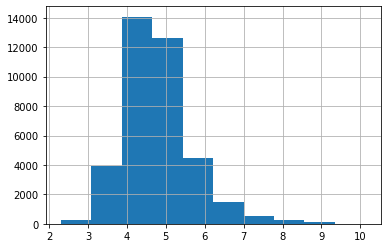

In [0]:
data['log_price'].hist()

In [0]:
data.loc[1]

id                                                                            344
listing_url                                      https://www.airbnb.com/rooms/344
scrape_id                                                          20200414051904
last_scraped                                                           2020-04-15
name                                            Family perfect;Pool;Near Studios!
                                                              ...                
calculated_host_listings_count_entire_homes                                     1
calculated_host_listings_count_private_rooms                                    0
calculated_host_listings_count_shared_rooms                                     0
reviews_per_month                                                            0.17
log_price                                                                 5.12396
Name: 1, Length: 107, dtype: object

In [0]:
wanted_cols=['neighbourhood_cleansed','city','zipcode', 'market','latitude', 'longitude','is_location_exact',
 'property_type','room_type', 'accommodates', 'bathrooms','bedrooms', 'beds', 'bed_type',
 'square_feet', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value',
 'host_listings_count', 'log_price']

df = data[wanted_cols]
df.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,Culver City,Culver City,90230,Los Angeles,33.98209,-118.38494,t,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,NaN,3,25.0,30,730,2,80.0,10.0,10.0,6.0,8.0,10.0,8.0,1.0,4.804021
1,Burbank,Burbank,91505,Los Angeles,34.16562,-118.33458,t,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,NaN,6,0.0,2,14,8,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.123964
2,Hollywood,Los Angeles,90046,Los Angeles,34.09768,-118.34602,t,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,NaN,1,0.0,30,366,24,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,4.369448
3,Santa Monica,Santa Monica,90405,Los Angeles,34.00475,-118.48127,t,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,NaN,1,0.0,1,180,21,94.0,9.0,9.0,9.0,9.0,10.0,9.0,2.0,5.043425
4,Bellflower,Bellflower,90706,Los Angeles,33.87619,-118.11397,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,1,25.0,2,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.382027


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


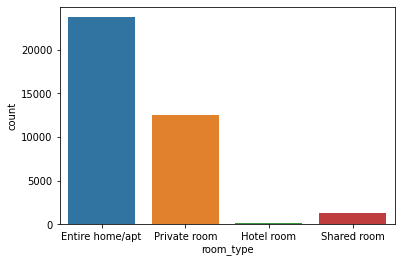

In [0]:
import seaborn as sns
sns.countplot(x='room_type',data=data)


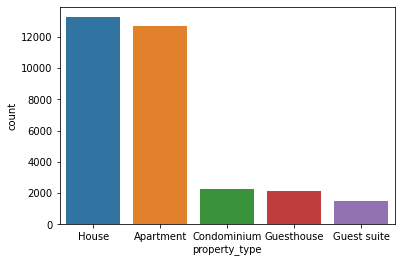

In [0]:
sns.countplot(x='property_type',data=data,  order=data.property_type.value_counts().iloc[:5].index)

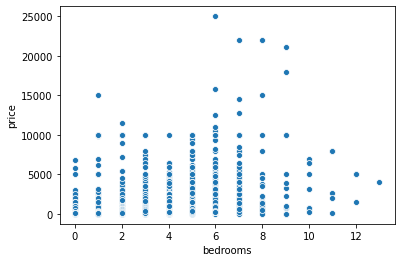

In [0]:
sns.scatterplot(x="bedrooms", y="price", data=data)

In [0]:
data.property_type.unique()

array(['Condominium', 'House', 'Apartment', 'Guest suite', 'Tiny house',
       'Guesthouse', 'Bungalow', 'Loft', 'Hotel', 'Townhouse', 'Island',
       'Bed and breakfast', 'Hostel', 'Boutique hotel', 'Villa',
       'Cottage', 'Cabin', 'Farm stay', 'Camper/RV', 'Treehouse', 'Other',
       'Aparthotel', 'Castle', 'Barn', 'Yurt', 'Dome house',
       'Serviced apartment', 'Tent', 'Tipi', 'Campsite', 'Boat', 'Chalet',
       'Earth house', 'Train', 'Resort', 'Hut', 'Minsu (Taiwan)', 'Dorm',
       'Bus', 'Igloo', 'Cave', 'Casa particular (Cuba)',
       'Pension (South Korea)', 'Vacation home', 'Nature lodge',
       'Houseboat'], dtype=object)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37713 entries, 0 to 37712
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       37713 non-null  object 
 1   city                         37702 non-null  object 
 2   zipcode                      37713 non-null  object 
 3   market                       37667 non-null  object 
 4   latitude                     37713 non-null  float64
 5   longitude                    37713 non-null  float64
 6   is_location_exact            37713 non-null  object 
 7   property_type                37713 non-null  object 
 8   room_type                    37713 non-null  object 
 9   accommodates                 37713 non-null  int64  
 10  bathrooms                    37686 non-null  float64
 11  bedrooms                     37620 non-null  float64
 12  beds                         37335 non-null  float64
 13  bed_type        

## Data Visualization

Let us take a sample of 1000 rows and use Folium to create an interactive visualization system

In [0]:
import folium

In [0]:
dfviz=data.sample(n=1000, random_state=42)
dfviz.to_pickle('./dfviz.pickle')

In [0]:
dfviz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 22445 to 36533
Columns: 107 entries, id to log_price
dtypes: float64(24), int64(21), object(62)
memory usage: 843.8+ KB


In [0]:
#Co-ordinates for 
latitude=34.0522
longitude=-118.2437
LA_Map = folium.Map(
                location = [latitude, longitude], 
                zoom_start = 10)

In [0]:
la_hotels = folium.map.FeatureGroup()
latitudes = list(dfviz.latitude)
longitudes = list(dfviz.longitude)
labels=list(dfviz.name)

for lat, lng,label in zip(latitudes, longitudes, labels):
    folium.Marker(
      location = [lat, lng],
        #popup=label,
      icon = folium.Icon(color='blue', icon='info-sign')
     ).add_to(LA_Map) 


In [0]:
LA_Map.add_child(la_hotels)
LA_Map

# Treating Missing Values

In [0]:
df.isnull().sum()

neighbourhood_cleansed             0
city                              11
zipcode                            0
market                            46
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         27
bedrooms                          93
beds                             378
bed_type                           0
square_feet                    37446
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating            8052
review_scores_accuracy          8099
review_scores_cleanliness       8098
review_scores_checkin           8111
review_scores_communication     8100
review_scores_location          8115
review_scores_value             8119
h

In [0]:
df = df.replace('_', np.nan)

In [0]:
df.isnull().sum()

neighbourhood_cleansed             0
city                              11
zipcode                            0
market                            46
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         27
bedrooms                          93
beds                             378
bed_type                           0
square_feet                    37446
guests_included                    0
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating            8052
review_scores_accuracy          8099
review_scores_cleanliness       8098
review_scores_checkin           8111
review_scores_communication     8100
review_scores_location          8115
review_scores_value             8119
h

In [0]:
missing_columns = []
for column in df.columns:
    nullcount = len(df[column][df[column].isnull()])
    totallen = len(df[column])
    dict1 = {'Name':column,'DataType':df[column].dtype, 'NumberOfNulls':nullcount, 'PercentageNulls':nullcount*100.0/totallen}
    missing_columns.append(dict1)
    
missing_col_df = pd.DataFrame(missing_columns)[['Name', 'DataType','NumberOfNulls','PercentageNulls']].sort_values(by='PercentageNulls', ascending=False)


In [0]:
missing_col_df

,Name,DataType,NumberOfNulls,PercentageNulls
14,square_feet,float64,37446,99.292021
26,review_scores_value,float64,8119,21.528385
25,review_scores_location,float64,8115,21.517779
23,review_scores_checkin,float64,8111,21.507173
24,review_scores_communication,float64,8100,21.478005
21,review_scores_accuracy,float64,8099,21.475353
22,review_scores_cleanliness,float64,8098,21.472702
20,review_scores_rating,float64,8052,21.350728
12,beds,float64,378,1.002307
11,bedrooms,float64,93,0.246599


## We see that the square feet has nulls about 99.3% so we remove it because it does not provide any support with our prediction.

In [0]:
impute_col_df = missing_col_df[missing_col_df.PercentageNulls < 90]

print(impute_col_df)

                           Name DataType  NumberOfNulls  PercentageNulls
26          review_scores_value  float64           8119        21.528385
25       review_scores_location  float64           8115        21.517779
23        review_scores_checkin  float64           8111        21.507173
24  review_scores_communication  float64           8100        21.478005
21       review_scores_accuracy  float64           8099        21.475353
22    review_scores_cleanliness  float64           8098        21.472702
20         review_scores_rating  float64           8052        21.350728
12                         beds  float64            378         1.002307
11                     bedrooms  float64             93         0.246599
3                        market   object             46         0.121974
10                    bathrooms  float64             27         0.071593
1                          city   object             11         0.029168
27          host_listings_count  float64           

In [0]:
for column in df.columns.values:
    if (np.any(impute_col_df.Name.values == column) == False):
        df.drop(column, axis=1, inplace=True)
        
df.head(5)

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,Culver City,Culver City,90230,Los Angeles,33.98209,-118.38494,t,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,3,25.0,30,730,2,80.0,10.0,10.0,6.0,8.0,10.0,8.0,1.0,4.804021
1,Burbank,Burbank,91505,Los Angeles,34.16562,-118.33458,t,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,6,0.0,2,14,8,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.123964
2,Hollywood,Los Angeles,90046,Los Angeles,34.09768,-118.34602,t,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,1,0.0,30,366,24,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,4.369448
3,Santa Monica,Santa Monica,90405,Los Angeles,34.00475,-118.48127,t,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,1,0.0,1,180,21,94.0,9.0,9.0,9.0,9.0,10.0,9.0,2.0,5.043425
4,Bellflower,Bellflower,90706,Los Angeles,33.87619,-118.11397,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,25.0,2,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.382027


## Now we impute the columns with missing values

#### We use mean for number columns and highest frequency for categorical columns

### a.Treating real value columns

In [0]:
number_colsfloat=impute_col_df[impute_col_df.DataType == 'float64' ]
number_colsint=impute_col_df[impute_col_df.DataType == 'int64' ]
number_colsfloat


,Name,DataType,NumberOfNulls,PercentageNulls
26,review_scores_value,float64,8119,21.528385
25,review_scores_location,float64,8115,21.517779
23,review_scores_checkin,float64,8111,21.507173
24,review_scores_communication,float64,8100,21.478005
21,review_scores_accuracy,float64,8099,21.475353
22,review_scores_cleanliness,float64,8098,21.472702
20,review_scores_rating,float64,8052,21.350728
12,beds,float64,378,1.002307
11,bedrooms,float64,93,0.246599
10,bathrooms,float64,27,0.071593


In [0]:
number_colsint

,Name,DataType,NumberOfNulls,PercentageNulls
17,minimum_nights,int64,0,0.0
19,number_of_reviews,int64,0,0.0
18,maximum_nights,int64,0,0.0
15,guests_included,int64,0,0.0
9,accommodates,int64,0,0.0


In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [0]:
df[number_colsfloat.Name] = imp.fit_transform(df[number_colsfloat.Name])

In [0]:
df[number_colsint.Name] = imp.fit_transform(df[number_colsint.Name])

### b.Treating categorical value columns

In [0]:
categorical_cols = impute_col_df[impute_col_df.DataType == 'object'].Name.values
df[categorical_cols] = df[categorical_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))



In [0]:
categorical_cols

array(['market', 'city', 'neighbourhood_cleansed', 'bed_type',
       'room_type', 'property_type', 'is_location_exact', 'zipcode'],
      dtype=object)

In [0]:
df.isnull().sum()

neighbourhood_cleansed         0
city                           0
zipcode                        0
market                         0
latitude                       0
longitude                      0
is_location_exact              0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_listings_count            0
log_price                      0
dtype: int64

In [0]:
df.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,Culver City,Culver City,90230,Los Angeles,33.98209,-118.38494,t,Condominium,Entire home/apt,6.0,2.0,2.0,3.0,Real Bed,3.0,25.0,30.0,730.0,2.0,80.000000,10.000000,10.00000,6.000000,8.000000,10.000000,8.000000,1.0,4.804021
1,Burbank,Burbank,91505,Los Angeles,34.16562,-118.33458,t,House,Entire home/apt,6.0,1.0,3.0,3.0,Real Bed,6.0,0.0,2.0,14.0,8.0,97.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,1.0,5.123964
2,Hollywood,Los Angeles,90046,Los Angeles,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,1.0,0.0,30.0,366.0,24.0,97.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,2.0,4.369448
3,Santa Monica,Santa Monica,90405,Los Angeles,34.00475,-118.48127,t,Apartment,Private room,1.0,1.0,1.0,1.0,Pull-out Sofa,1.0,0.0,1.0,180.0,21.0,94.000000,9.000000,9.00000,9.000000,9.000000,10.000000,9.000000,2.0,5.043425
4,Bellflower,Bellflower,90706,Los Angeles,33.87619,-118.11397,t,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,1.0,25.0,2.0,730.0,0.0,94.253498,9.607753,9.41793,9.745355,9.716037,9.704406,9.426336,1.0,4.382027


## Label Encoding

#### To make categorical values into numbers 

In [0]:
df2 = df.copy(deep= True)

In [0]:
from sklearn.preprocessing import LabelEncoder
def categorical_encoding(array):
    return LabelEncoder().fit_transform(array) 


In [0]:
categorical_cols

array(['market', 'city', 'neighbourhood_cleansed', 'bed_type',
       'room_type', 'property_type', 'is_location_exact', 'zipcode'],
      dtype=object)

In [0]:
df2[categorical_cols] = df2[categorical_cols].apply(categorical_encoding)

In [0]:
df2.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,53,51,103,26,33.98209,-118.38494,1,15,0,6.0,2.0,2.0,3.0,4,3.0,25.0,30.0,730.0,2.0,80.000000,10.000000,10.00000,6.000000,8.000000,10.000000,8.000000,1.0,4.804021
1,31,28,258,26,34.16562,-118.33458,1,25,0,6.0,1.0,3.0,3.0,4,6.0,0.0,2.0,14.0,8.0,97.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,1.0,5.123964
2,101,127,75,26,34.09768,-118.34602,1,1,2,1.0,1.5,1.0,1.0,4,1.0,0.0,30.0,366.0,24.0,97.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,2.0,4.369448
3,193,253,139,26,34.00475,-118.48127,1,1,2,1.0,1.0,1.0,1.0,3,1.0,0.0,1.0,180.0,21.0,94.000000,9.000000,9.00000,9.000000,9.000000,10.000000,9.000000,2.0,5.043425
4,22,21,160,26,33.87619,-118.11397,1,1,0,2.0,1.0,1.0,1.0,4,1.0,25.0,2.0,730.0,0.0,94.253498,9.607753,9.41793,9.745355,9.716037,9.704406,9.426336,1.0,4.382027


In [0]:
df2.to_csv('processed data.csv')

## Model Building

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df2.head()

,neighbourhood_cleansed,city,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,log_price
0,53,51,103,26,33.98209,-118.38494,1,15,0,6.0,2.0,2.0,3.0,4,3.0,25.0,30.0,730.0,2.0,80.000000,10.000000,10.00000,6.000000,8.000000,10.000000,8.000000,1.0,4.804021
1,31,28,258,26,34.16562,-118.33458,1,25,0,6.0,1.0,3.0,3.0,4,6.0,0.0,2.0,14.0,8.0,97.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,1.0,5.123964
2,101,127,75,26,34.09768,-118.34602,1,1,2,1.0,1.5,1.0,1.0,4,1.0,0.0,30.0,366.0,24.0,97.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,2.0,4.369448
3,193,253,139,26,34.00475,-118.48127,1,1,2,1.0,1.0,1.0,1.0,3,1.0,0.0,1.0,180.0,21.0,94.000000,9.000000,9.00000,9.000000,9.000000,10.000000,9.000000,2.0,5.043425
4,22,21,160,26,33.87619,-118.11397,1,1,0,2.0,1.0,1.0,1.0,4,1.0,25.0,2.0,730.0,0.0,94.253498,9.607753,9.41793,9.745355,9.716037,9.704406,9.426336,1.0,4.382027


In [0]:
X=df2.drop(['log_price'],axis=1)
y=df2['log_price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=120)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg=LinearRegression()

In [0]:
model=reg.fit(X_train,y_train)

In [0]:
y_pred=model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(((y_pred - y_test) ** 2).mean())
print('R2 score for Linear Regression is: {}'.format(score))
print('\n')
print('Mean Squared Error for Linear Regression is : {} '.format(mse))
print('\n')
print('Root Mean Squared Error for Linear Regression is : {} '.format(rmse))

R2 score for Linear Regression is: 0.6220799354276147


Mean Squared Error for Linear Regression is : 0.297058296996866 


Root Mean Squared Error for Linear Regression is : 0.5450305468474821 


In [0]:
reg2=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [0]:
model2=reg.fit(X_train,y_train)

In [0]:
y_pred=model2.predict(X_test)

In [0]:
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(((y_pred - y_test) ** 2).mean())
print('R2 score for Linear Regression is: {}'.format(score))
print('\n')
print('Mean Squared Error for Linear Regression is : {} '.format(mse))
print('\n')
print('Root Mean Squared Error for Linear Regression is : {} '.format(rmse))

R2 score for Linear Regression is: 0.6220799354276147


Mean Squared Error for Linear Regression is : 0.297058296996866 


Root Mean Squared Error for Linear Regression is : 0.5450305468474821 


In [0]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Lasso
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1] 
rmse = []
mse=[]
r2=[]
ev=[] 
for alpha in alphas: 
  lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77) 
  val_errors=np.sum(-cross_val_score(lasso, X, y=y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1))
  mse.append(np.sum(-cross_val_score(lasso, X, y=y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)))
  r2.append(np.mean(cross_val_score(lasso, X, y=y, scoring='r2', cv=10, n_jobs=-1)))
  ev.append(np.mean(cross_val_score(lasso, X, y=y, scoring='explained_variance', cv=10, n_jobs=-1))) 
  rmse.append(np.sqrt(val_errors))

In [0]:
def get_cv_scores(model):
    cvscore = cross_val_score(model,
                              X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    print('Mean R2 score: ', np.mean(cvscore))
    print('Standard Deviation: ', np.std(cvscore))
    print('\n')
get_cv_scores(reg)

Mean R2 score:  0.622692760493141
Standard Deviation:  0.016037833511922766




In [0]:
mse

[2.98752584377056,
 2.9886106836853097,
 3.0640812236975092,
 3.5824706674505022,
 5.855189996299757,
 7.799524550036743]

In [0]:
r2

[0.6205253136386688,
 0.6203630651735393,
 0.6104073620389556,
 0.5453998052633746,
 0.253046756330609,
 0.0018885421867185115]

In [0]:
ev

[0.6238063981655486,
 0.6236749580253338,
 0.6141816012908652,
 0.5511763281308797,
 0.25708071090894036,
 0.0044936744831575726]

In [0]:
rmse

[1.7284460777734896,
 1.7287598687166792,
 1.7504517198990406,
 1.8927415743969123,
 2.4197499863208507,
 2.7927628882589985]

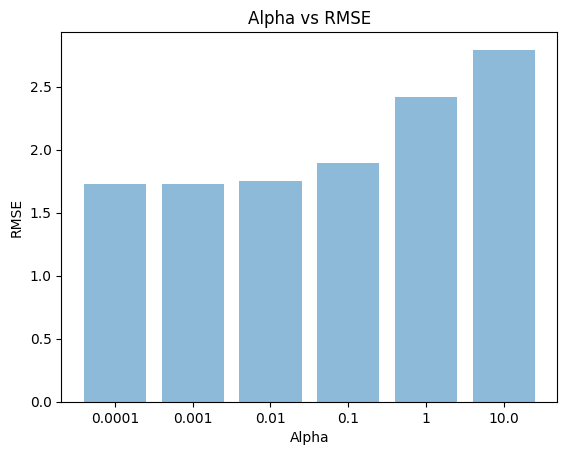

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

xlabel = alphas
y_pos = np.arange(len(xlabel))
ylabel = rmse

plt.bar(y_pos,ylabel, align='center', alpha=0.5)
plt.xticks(y_pos, xlabel)
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.title('Alpha vs RMSE')

plt.show()

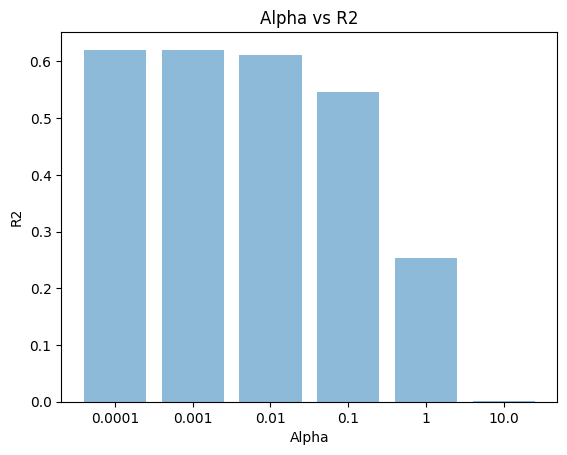

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

xlabel = alphas
y_pos = np.arange(len(xlabel))
ylabel = r2

plt.bar(y_pos,ylabel, align='center', alpha=0.5)
plt.xticks(y_pos, xlabel)
plt.ylabel('R2')
plt.xlabel('Alpha')
plt.title('Alpha vs R2')
plt.show()

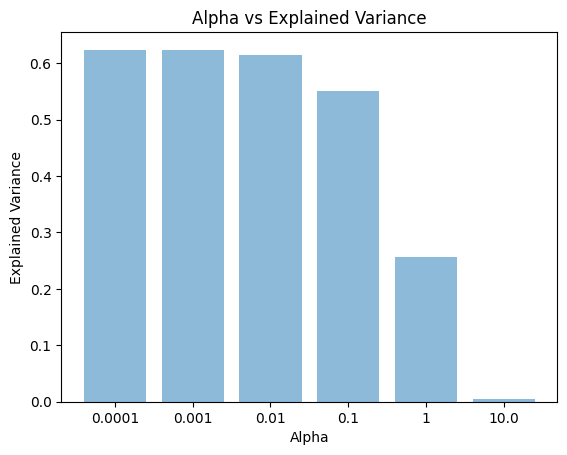

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

xlabel = alphas
y_pos = np.arange(len(xlabel))
ylabel = ev

plt.bar(y_pos,ylabel, align='center', alpha=0.5)
plt.xticks(y_pos, xlabel)
plt.ylabel('Explained Variance')
plt.xlabel('Alpha')
plt.title('Alpha vs Explained Variance')
plt.show()

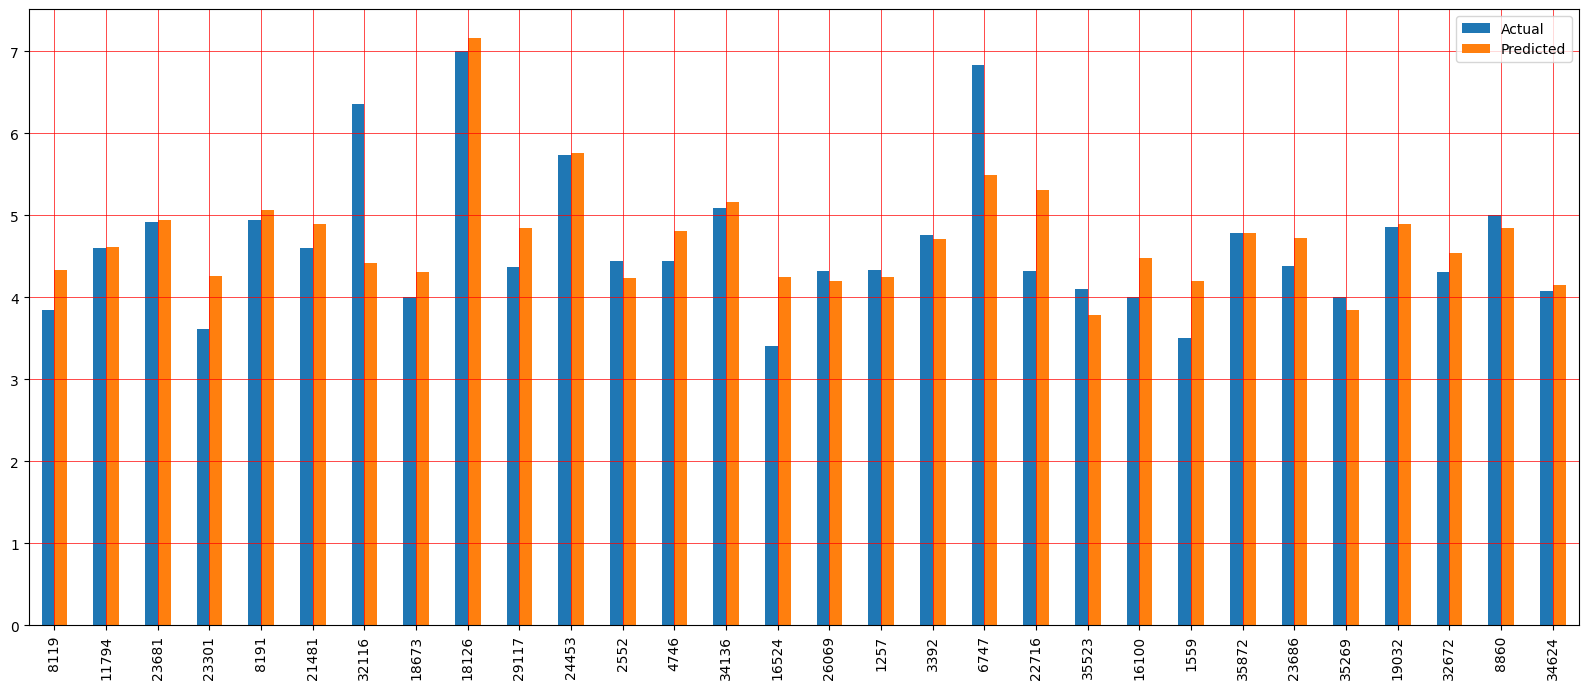

In [0]:
result_df = pd.DataFrame(columns=['Actual','Predicted'])
result_df['Actual'] = y_test 
result_df['Predicted'] = y_pred
df=result_df.head(30)
df.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='brown')
plt.show()